In [1]:
import numpy as np
import pandas as pd
import re
import quandl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
quandl.ApiConfig.api_key = "2At3atzXCrMx_BXfkyz7"
# 6b7jcHuxwW7Wot1kyFNS

### Data to be used

In [3]:
metadata = pd.read_csv('BSE_metadata.csv')
metadata.head()

,code,name,description,refreshed_at,from_date,to_date
0,BOM500002,ABB India Limited EOD Prices,End of Day prices and additional trading infor...,1/19/2021 14:15,3/2/1992,1/18/2021
1,BOM500003,AEGIS LOGISTICS LTD. EOD Prices,End of Day prices and additional trading infor...,1/19/2021 14:15,3/2/1992,1/18/2021
2,BOM500008,AMARA RAJA BATTERIES LTD. EOD Prices,End of Day prices and additional trading infor...,1/19/2021 14:15,3/2/1992,1/18/2021
3,BOM500009,AMBALAL SARABHAI ENTERPRISES LTD. EOD Prices,End of Day prices and additional trading infor...,1/19/2021 14:15,3/2/1992,1/18/2021
4,BOM500010,HOUSING DEVELOPMENT FINANCE CORP.LTD. EOD Prices,End of Day prices and additional trading infor...,1/19/2021 14:15,1/3/1992,1/18/2021


In [4]:
metadata[metadata['name'].str.contains('sensex', case = False)]

,code,name,description,refreshed_at,from_date,to_date
3605,BOM532985,KOTAK SENSEX ETF EOD Prices,End of Day prices and additional trading infor...,1/19/2021 14:16,6/16/2008,1/19/2021
3897,BOM535276,SBI Mutual Fund - SBI Sensex ETF EOD Prices,End of Day prices and additional trading infor...,1/19/2021 14:16,3/28/2013,1/19/2021
4127,BOM538683,NIPPON INDIA ETF SENSEX EOD Prices,End of Day prices and additional trading infor...,1/19/2021 14:16,9/26/2014,1/19/2021
4412,BOM539312,UTI- SENSEX ETF EOD Prices,End of Day prices and additional trading infor...,1/19/2021 14:16,9/3/2015,1/19/2021
4975,BOM555555,ICICI Prudential Sensex ETF EOD Prices,End of Day prices and additional trading infor...,1/19/2021 14:16,1/13/2003,1/19/2021
5078,SENSEX,BSE SENSEX,Historical BSE indexes for BSE SENSEX (SENSEX),1/19/2021 19:30,4/3/1979,1/19/2021
5100,SPBSDGDH,BSE SENSEX Dynamic Gold Hedged Index,Historical BSE indexes for BSE SENSEX Dynamic ...,7/12/2016 22:30,4/25/2016,7/11/2016
5106,SPBSGLDH,BSE SENSEX Gold Hedged Index,Historical BSE indexes for BSE SENSEX Gold Hed...,7/12/2016 22:30,4/25/2016,7/11/2016
5113,SPBSN5IP,BSE SENSEX Next 50,Historical BSE indexes for BSE SENSEX Next 50 ...,1/19/2021 19:30,9/19/2017,1/19/2021
5115,SPBSS5IP,BSE SENSEX 50,Historical BSE indexes for BSE SENSEX 50 (SPBS...,1/19/2021 19:30,9/19/2017,1/19/2021


In [5]:
stocks = ['BOM500034','BOM500180','BOM500510','BOM500520','BOM500696','BOM500820','BOM532500','BOM532977','BOM532215','BOM500247','BOM532187','BOM532174',
'BOM500112','BOM532538','BOM500875','BOM500790','BOM500114','BOM500510','BOM500010','BOM532978','BOM500034','BOM532755','BOM532540',
'BOM500209','BOM532281','BOM500325','BOM500312','BOM500820','BOM524715','BOM500124','BOM532898','BOM532555']
indices = ['SENSEX','SI1000','SI1400','SI1900','SIBPSU','SIBTEC','SIPOWE','SIREAL','SPBSCDIP']

In [6]:
stockMetadata = metadata[metadata['code'].isin(stocks+indices)]
stockMetadata.head()

,code,name,description,refreshed_at,from_date,to_date
4,BOM500010,HOUSING DEVELOPMENT FINANCE CORP.LTD. EOD Prices,End of Day prices and additional trading infor...,1/19/2021 14:15,1/3/1992,1/18/2021
19,BOM500034,Bajaj Finance Limited EOD Prices,End of Day prices and additional trading infor...,1/19/2021 14:15,5/2/1995,1/18/2021
62,BOM500112,STATE BANK OF INDIA EOD Prices,End of Day prices and additional trading infor...,1/19/2021 14:15,5/5/1995,1/18/2021
64,BOM500114,Titan Company Limited EOD Prices,End of Day prices and additional trading infor...,1/19/2021 14:15,5/5/1995,1/18/2021
70,BOM500124,DR.REDDY'S LABORATORIES LTD. EOD Prices,End of Day prices and additional trading infor...,1/19/2021 14:15,3/2/1992,1/18/2021


In [7]:
print(stockMetadata.shape)
print(stockMetadata[stockMetadata['code'].isin(stocks)].shape)
print(stockMetadata[stockMetadata['code'].isin(indices)].shape)

(38, 6)
(29, 6)
(9, 6)


In [8]:
stockMetadata.loc[:, 'isStock'] = 0
stockMetadata.head()

,code,name,description,refreshed_at,from_date,to_date,isStock
4,BOM500010,HOUSING DEVELOPMENT FINANCE CORP.LTD. EOD Prices,End of Day prices and additional trading infor...,1/19/2021 14:15,1/3/1992,1/18/2021,0
19,BOM500034,Bajaj Finance Limited EOD Prices,End of Day prices and additional trading infor...,1/19/2021 14:15,5/2/1995,1/18/2021,0
62,BOM500112,STATE BANK OF INDIA EOD Prices,End of Day prices and additional trading infor...,1/19/2021 14:15,5/5/1995,1/18/2021,0
64,BOM500114,Titan Company Limited EOD Prices,End of Day prices and additional trading infor...,1/19/2021 14:15,5/5/1995,1/18/2021,0
70,BOM500124,DR.REDDY'S LABORATORIES LTD. EOD Prices,End of Day prices and additional trading infor...,1/19/2021 14:15,3/2/1992,1/18/2021,0


In [9]:
stockMetadata.loc[stockMetadata['code'].isin(stocks), 'isStock'] = 1
stockMetadata.reset_index(inplace=True)
stockMetadata.head()

,index,code,name,description,refreshed_at,from_date,to_date,isStock
0,4,BOM500010,HOUSING DEVELOPMENT FINANCE CORP.LTD. EOD Prices,End of Day prices and additional trading infor...,1/19/2021 14:15,1/3/1992,1/18/2021,1
1,19,BOM500034,Bajaj Finance Limited EOD Prices,End of Day prices and additional trading infor...,1/19/2021 14:15,5/2/1995,1/18/2021,1
2,62,BOM500112,STATE BANK OF INDIA EOD Prices,End of Day prices and additional trading infor...,1/19/2021 14:15,5/5/1995,1/18/2021,1
3,64,BOM500114,Titan Company Limited EOD Prices,End of Day prices and additional trading infor...,1/19/2021 14:15,5/5/1995,1/18/2021,1
4,70,BOM500124,DR.REDDY'S LABORATORIES LTD. EOD Prices,End of Day prices and additional trading infor...,1/19/2021 14:15,3/2/1992,1/18/2021,1


In [10]:
stockMetadata['isStock'].value_counts()

1    29
0     9
Name: isStock, dtype: int64

In [11]:
# download the required data - needed only 1 time
i=0
code = f'BSE/{stockMetadata.loc[i, "code"]}'
dataset = quandl.get(code, start_date='2000-01-01', end_date='2021-03-23').sort_values(by='Date', ascending=True)
dataset['StockName']=stockMetadata.loc[i, 'name']
dataset['code'] = stockMetadata.loc[i, "code"]
dataset['isStock'] = stockMetadata.loc[i, "isStock"]

for i in range(1, len(stockMetadata)):
    code = f'BSE/{stockMetadata.loc[i, "code"]}'
    temp = quandl.get(code, start_date='2000-01-01', end_date='2021-03-23').sort_values(by='Date', ascending=True)
    temp['StockName']=stockMetadata.loc[i, 'name']
    temp['code'] = stockMetadata.loc[i, "code"]
    temp['isStock'] = stockMetadata.loc[i, "isStock"]
    print(code, stockMetadata.loc[i, 'name'], temp.shape)
    dataset = dataset.append(temp)
dataset.to_csv('data.csv')
dataset.head()

BSE/BOM500034 Bajaj Finance Limited EOD Prices (5208, 15)
BSE/BOM500112 STATE BANK OF INDIA EOD Prices (5281, 15)
BSE/BOM500114 Titan Company Limited EOD Prices (5280, 15)
BSE/BOM500124 DR.REDDY'S LABORATORIES LTD. EOD Prices (5281, 15)
BSE/BOM500180 HDFC Bank Ltd EOD Prices (5281, 15)
BSE/BOM500209 INFOSYS LTD. EOD Prices (5281, 15)
BSE/BOM500247 KOTAK MAHINDRA BANK LTD. EOD Prices (5280, 15)
BSE/BOM500312 Oil and Natural Gas Corporation Ltd EOD Prices (5280, 15)
BSE/BOM500325 RELIANCE INDUSTRIES LTD. EOD Prices (5281, 15)
BSE/BOM500510 LARSEN & TOUBRO LTD. EOD Prices (5256, 15)
BSE/BOM500520 MAHINDRA & MAHINDRA LTD. EOD Prices (5281, 15)
BSE/BOM500696 HINDUSTAN UNILEVER LTD. EOD Prices (5281, 15)
BSE/BOM500790 NESTLE INDIA LTD. EOD Prices (5280, 15)
BSE/BOM500820 ASIAN PAINTS LTD. EOD Prices (5279, 15)
BSE/BOM500875 ITC LTD. EOD Prices (5280, 15)
BSE/BOM524715 SUN PHARMACEUTICAL INDUSTRIES LTD. EOD Prices (5280, 15)
BSE/BOM532174 ICICI BANK LTD. EOD Prices (5280, 15)
BSE/BOM532187 IN

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O,StockName,code,isStock
Date,,,,,,,,,,,,,,,
2000-01-03,300.0,308.85,293.05,308.85,302.776161,1248793.0,5321.0,378104750.0,NaN,NaN,15.8,8.85,HOUSING DEVELOPMENT FINANCE CORP.LTD. EOD Prices,BOM500010,1
2000-01-04,323.0,323.50,294.00,303.75,304.242315,709535.0,3573.0,215870571.0,NaN,NaN,29.5,-19.25,HOUSING DEVELOPMENT FINANCE CORP.LTD. EOD Prices,BOM500010,1
2000-01-05,299.0,301.00,280.00,292.00,291.781520,504413.0,2787.0,147178392.0,NaN,NaN,21.0,-7.00,HOUSING DEVELOPMENT FINANCE CORP.LTD. EOD Prices,BOM500010,1
2000-01-06,295.0,303.40,292.00,294.10,298.500481,398878.0,2086.0,119065275.0,NaN,NaN,11.4,-0.90,HOUSING DEVELOPMENT FINANCE CORP.LTD. EOD Prices,BOM500010,1
2000-01-07,292.0,294.80,279.30,285.00,285.736941,626494.0,2882.0,179012479.0,NaN,NaN,15.5,-7.00,HOUSING DEVELOPMENT FINANCE CORP.LTD. EOD Prices,BOM500010,1


In [16]:
dataset = pd.read_csv('data.csv')
dataset.head()

,Date,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O,StockName,code,isStock
0,2000-01-03,300.0,308.85,293.05,308.85,302.776161,1248793.0,5321.0,378104750.0,NaN,NaN,15.8,8.85,HOUSING DEVELOPMENT FINANCE CORP.LTD. EOD Prices,BOM500010,1
1,2000-01-04,323.0,323.50,294.00,303.75,304.242315,709535.0,3573.0,215870571.0,NaN,NaN,29.5,-19.25,HOUSING DEVELOPMENT FINANCE CORP.LTD. EOD Prices,BOM500010,1
2,2000-01-05,299.0,301.00,280.00,292.00,291.781520,504413.0,2787.0,147178392.0,NaN,NaN,21.0,-7.00,HOUSING DEVELOPMENT FINANCE CORP.LTD. EOD Prices,BOM500010,1
3,2000-01-06,295.0,303.40,292.00,294.10,298.500481,398878.0,2086.0,119065275.0,NaN,NaN,11.4,-0.90,HOUSING DEVELOPMENT FINANCE CORP.LTD. EOD Prices,BOM500010,1
4,2000-01-07,292.0,294.80,279.30,285.00,285.736941,626494.0,2882.0,179012479.0,NaN,NaN,15.5,-7.00,HOUSING DEVELOPMENT FINANCE CORP.LTD. EOD Prices,BOM500010,1


In [17]:

sensex_closing = dataset.loc[dataset.code=='SENSEX' , ['Date', 'Close']]
sensex_closing.head()

,Date,Close
140775,2000-01-03,5375.11
140776,2000-01-04,5491.01
140777,2000-01-05,5357.00
140778,2000-01-06,5421.53
140779,2000-01-07,5414.48


In [13]:
print(np.min(sensex_closing.index), np.max(sensex_closing.index))

140775 146055


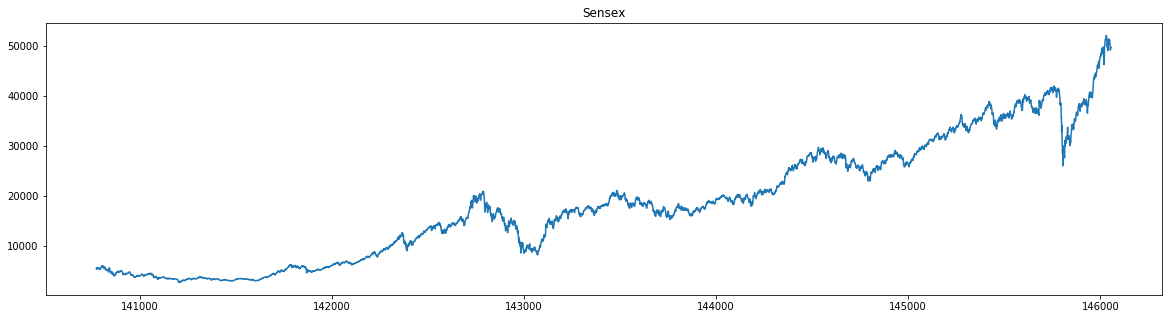

In [14]:
sensex_closing.Close.plot(figsize=(20, 5), title="Sensex")
plt.show()

# Build time series for 30 days out of daily data

In [15]:
sensex_closing = sensex_closing.sort_values(by='Date')

KeyError: 'Date'

In [ ]:
sensex_closing.head()

In [ ]:
sensex_closing.Close.resample('M').last()

In [ ]:
# birth_date column value 
sensex_closing['Month'] = sensex_closing.index.month 
sensex_closing['year'] = sensex_closing.index.year
sensex_closing.head()

In [ ]:
sensex_closing[(sensex_closing.year==2000) & (sensex_closing.Month==1)]